In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch

In [2]:
#device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
torch.cuda.device_count()

0

In [4]:
#by default,tensors are on cpu, we have to shift them to gpu manually
tensor = torch.tensor([1,2,3])
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [5]:
tensor_on_gpu = tensor.to(device)
print(tensor_on_gpu, tensor_on_gpu.device)

tensor([1, 2, 3]) cpu


In [6]:
#if tensor is on gpu, we cant transform it to numpy

In [7]:
from torch import nn

In [8]:
#creating some data using known parameters of linear regression

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = X*weight + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [9]:
len(X), len(y)

(50, 50)

In [10]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [11]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [12]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions=None):

    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data, train_labels, c="b", s=4, label="training_data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label = "testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={'size': 14});



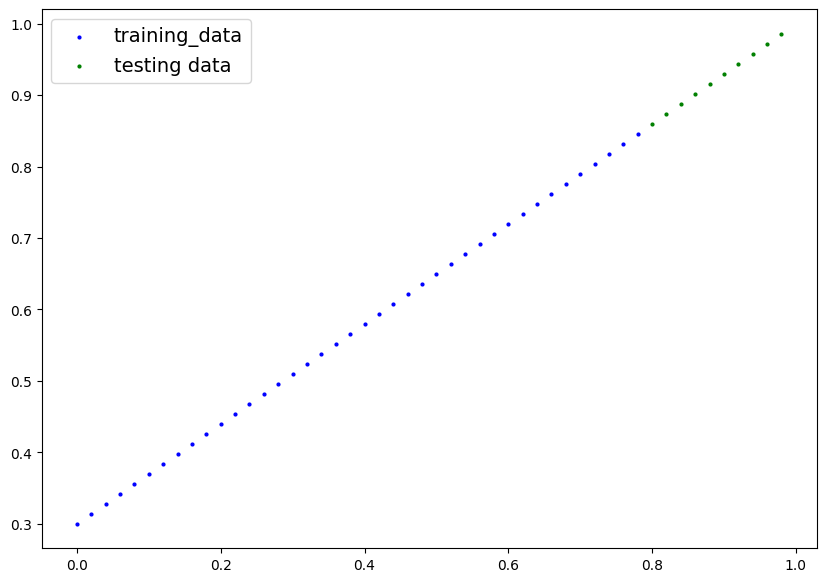

In [13]:
plot_predictions()

In [14]:
from torch import nn


class LinearRegressionModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                    requires_grad = True,
                                    dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    def forward(self, X:torch.Tensor):
        return self.weights * X + self.bias


In [15]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

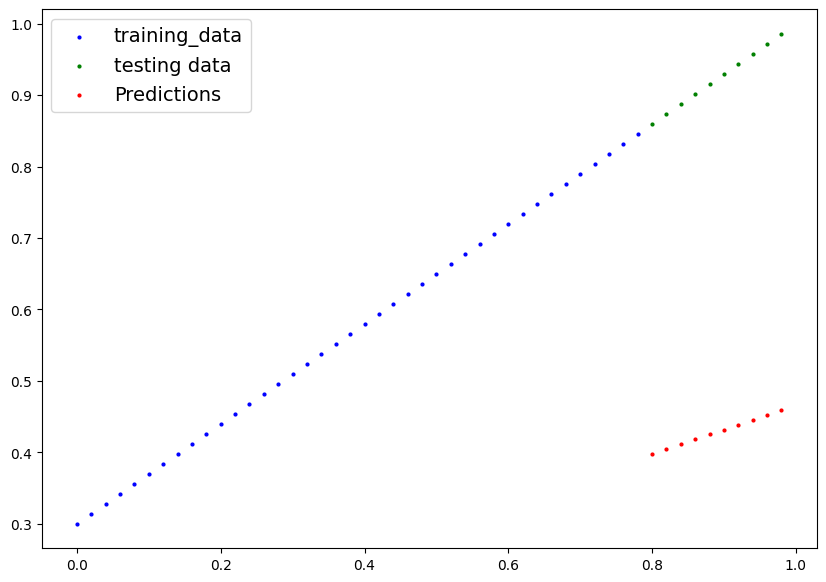

In [18]:
plot_predictions(predictions=y_pred)

In [19]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.RMSprop(params = model_0.parameters(),
                           lr = 0.005)

In [20]:
epochs = 50

#tracking purposes
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    #print(f"loss {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
        
    if epoch%10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)

    print(f"Epoch : {epoch} | loss : {loss} | test_loss: {test_loss}")

Epoch : 0 | loss : 0.31288138031959534 | test_loss: 0.40003618597984314
Epoch : 1 | loss : 0.2433813512325287 | test_loss: 0.33304694294929504
Epoch : 2 | loss : 0.19411413371562958 | test_loss: 0.27821341156959534
Epoch : 3 | loss : 0.1537868082523346 | test_loss: 0.23060739040374756
Epoch : 4 | loss : 0.11877499520778656 | test_loss: 0.18792101740837097
Epoch : 5 | loss : 0.08738130331039429 | test_loss: 0.14885668456554413
Epoch : 6 | loss : 0.059910714626312256 | test_loss: 0.1162380799651146
Epoch : 7 | loss : 0.04205044358968735 | test_loss: 0.0908609926700592
Epoch : 8 | loss : 0.03189601004123688 | test_loss: 0.07302562892436981
Epoch : 9 | loss : 0.02678786776959896 | test_loss: 0.060103096067905426
Epoch : 10 | loss : 0.024030137807130814 | test_loss: 0.052300892770290375
Epoch : 11 | loss : 0.022393183782696724 | test_loss: 0.048084087669849396
Epoch : 12 | loss : 0.021094541996717453 | test_loss: 0.04390401393175125
Epoch : 13 | loss : 0.019800132140517235 | test_loss: 0.03

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6944])), ('bias', tensor([0.3096]))])

In [22]:
weight, bias

(0.7, 0.3)

In [23]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

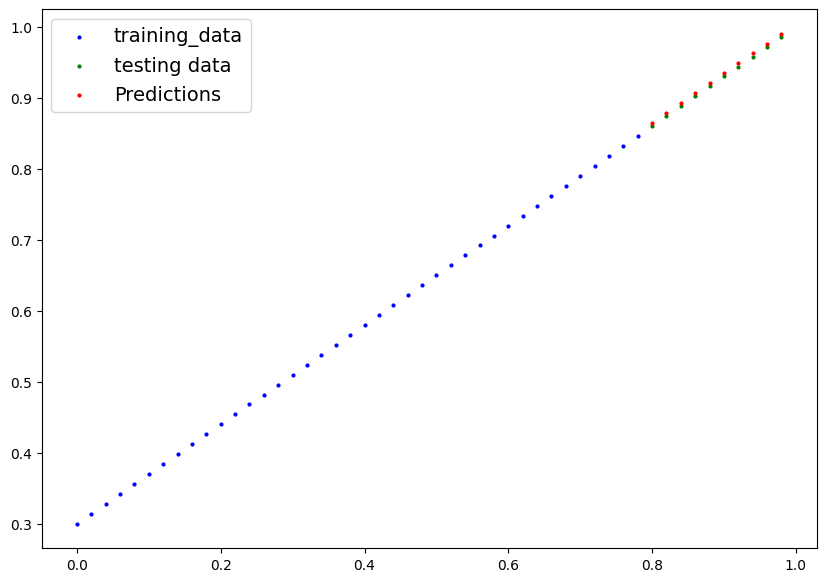

In [24]:
plot_predictions(predictions = y_preds_new);

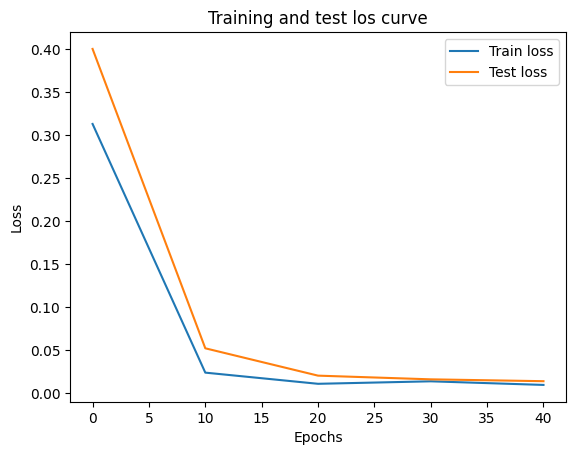

In [25]:
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label = "Train loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label="Test loss")
plt.title("Training and test los curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Saving a pytorch model:

There are three main methods:

1. 'torch.save()' - stores the model in pickle format
2. 'torch.load()' - loads the model
3. 'torch.nn.Module.load_state_dict()' - load saved state dictionary of a model

In [26]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"

MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

In [27]:
torch.save(obj=model_0.state_dict(),
          f = MODEL_SAVE_PATH)

In [28]:
ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jul 17 06:41 01_pytorch_workflow_model_0.pth


# Loading a model:

We will create a `new instance` of our model and load the saved `state_dict()` into it

In [29]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6944])), ('bias', tensor([0.3096]))])

In [30]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [31]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [32]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6944])), ('bias', tensor([0.3096]))])

In [33]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8651],
        [0.8790],
        [0.8929],
        [0.9068],
        [0.9207],
        [0.9346],
        [0.9485],
        [0.9624],
        [0.9762],
        [0.9901]])

In [34]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

## Another way to make the LinearRegressionModel:


```python
class LinearRegressionModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear_layer(in_features=1,
                          out_features=1)
        
    def forward(self, X:torch.Tensor):
        return self.linear_layers(x)
```